In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from PIL import Image
from resizeimage import resizeimage
import cv2
import os
from IPython.display import clear_output
import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from time import time
from sklearn.model_selection import GridSearchCV
import argparse

In [9]:
path_train = "./chest_xray/train/"
path_test = "./chest_xray/test/"
path_val = "./chest_xray/val/"


In [10]:
def hist(img):
  img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
  img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
  hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
  return hist_equalization_result

saliency
compute
map
imshow


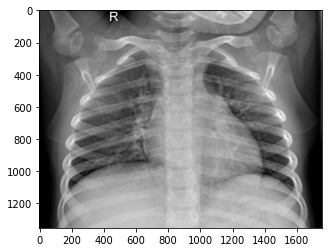

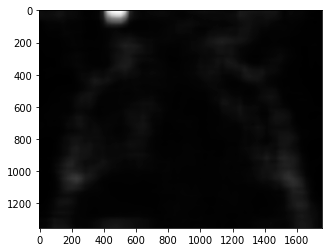

ValueError: operands could not be broadcast together with shapes (224,224) (1352,1754,3) (224,224) 

In [15]:
path_nor_train = path_train + "NORMAL"
path_neu_train = path_train + "PNEUMONIA"

porcentaje = 1
porcentaje = int(1/porcentaje)

n_imagenes_nor_train = len(listdir(path_nor_train)) // porcentaje
n_imagenes_neu_train = len(listdir(path_neu_train)) // porcentaje
n_imagenes_neu_train = n_imagenes_nor_train #Hago esto para tener el mismo número de datos de 
                                            #una clase que de la otra

imagenes_normal = np.zeros(shape=(n_imagenes_nor_train, 224, 224))
imagenes_pneumonia = np.zeros(shape=(n_imagenes_nor_train, 224, 224)) 

y_train = np.zeros(shape=(n_imagenes_nor_train + n_imagenes_neu_train))

for condicion in ["NORMAL", "PNEUMONIA"]:
    path = path_train + condicion
    lista_directorios = listdir(path)
    
    for index, im in enumerate(lista_directorios[0:len(lista_directorios)// porcentaje]):
        imagen = cv2.imread(path + "/" + im)
        
        print("saliency")
        saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
        #imagen = cv2.resize(imagen, (224,224))[:,:,0]
        print("compute")
        (success, saliencyMap) = saliency.computeSaliency(imagen)
        print("map")
        saliencyMap = (saliencyMap * 255).astype("uint8")
        print("imshow")
        plt.imshow(imagen, cmap="Greys_r")
        plt.show()
        plt.imshow(saliencyMap, cmap="Greys_r")
        plt.show()
        cv2.waitKey(0)
        
        #imagen = hist(imagen) #Sube el contraste de las imagenes
        
        if condicion == "NORMAL":
            imagenes_normal[index] += imagen
            y_train[index] += 0
        else:
            imagenes_pneumonia[index] += imagen
            y_train[index] += 1
        
       # clear_output(wait=True)
       # print(str(100*(index+1)/(len(lista_directorios)//porcentaje)) + "%")
                
        break
        if index >= (n_imagenes_neu_train-1):
            break


print(imagenes_normal[0].shape, len(imagenes_pneumonia), type(imagenes_normal[0]))

In [2]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="")
args = vars(ap.parse_args())
# load the input image
image = cv2.imread(args["image"])

<module 'cv2.saliency'>